Our big question is - what combination of factors best determine the total worldwide gross of a movie?

In [1]:
#relevant imports 

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loads in data and previews it
data = pd.read_csv("../../CSV/archive (2)/boxofficemojo_releases.csv")
data.head(1)


,identifier,old_bomojo_id,title,imdb_title_identifier,imdb_title_bomojo_url,budget,distributor_name,domestic_gross,international_gross,worldwide_gross,...,release_date,widest_release,synopsis,genres,mpaa_rating,running_time,hsx_symbol,bomojo_type,url,updated_at
0,rl168527361,NaN,The Empty Man,tt5867314,https://www.boxofficemojo.com/title/tt5867314/...,0.0,20th Century Studios,1401379,118376,1519755,...,2020-10-23,"2,027 theaters","On the trail of a missing girl, an ex-cop come...","['Crime', 'Drama', 'Horror', 'Mystery', 'Thril...",R,2 hr 17 min,NaN,release,https://www.boxofficemojo.com/release/rl168527361,2020-10-28 07:31:20.40873 UTC


In [3]:
len(data)

16968

In [4]:
# Grabbing useful data
useful_data = data [["title", "imdb_title_identifier", "distributor_name", "budget", "release_date", "worldwide_gross", "genres", "mpaa_rating", "running_time"]]

In [5]:
useful_data = useful_data.dropna()
len(useful_data)

8328

In [6]:
useful_data.head()
# this is our clean and good data.

,title,imdb_title_identifier,distributor_name,budget,release_date,worldwide_gross,genres,mpaa_rating,running_time
0,The Empty Man,tt5867314,20th Century Studios,0.0,2020-10-23,1519755,"['Crime', 'Drama', 'Horror', 'Mystery', 'Thril...",R,2 hr 17 min
1,The Addams Family,tt1620981,United Artists Releasing,24000000.0,2020-10-23,304281,"['Animation', 'Comedy', 'Family', 'Fantasy', '...",PG,1 hr 26 min
2,"Monsters, Inc.",tt0198781,Walt Disney Studios Motion Pictures,115000000.0,2020-10-23,494000,"['Adventure', 'Animation', 'Comedy', 'Family',...",G,1 hr 32 min
3,After We Collided,tt10362466,Open Road Films (II),0.0,2020-10-23,47696068,"['Drama', 'Romance']",R,1 hr 45 min
5,The Nightmare Before Christmas,tt0107688,Walt Disney Studios Motion Pictures,0.0,2020-10-16,1900000,"['Animation', 'Family', 'Fantasy', 'Musical']",PG,1 hr 16 min


<h3> DISTRIBUTOR NAME

In [7]:
# Grouping data by 'Distributor' and calculating the total gross and average gross per movie
grouped_data = useful_data.groupby('distributor_name')['worldwide_gross'].agg(['sum', 'mean', 'count'])
grouped_data.columns = ['Total_Gross', 'Average_Gross', 'Count']

# Sorting the distributors based on their total gross in descending order
grouped_data_sorted = grouped_data.sort_values(by='Average_Gross', ascending=False)

print(grouped_data_sorted.head(20))


                                     Total_Gross  Average_Gross  Count
distributor_name                                                      
DreamWorks                           11783396674   3.021384e+08     39
Walt Disney Studios Motion Pictures  82659880628   2.240105e+08    369
Twentieth Century Fox                62770628558   1.682859e+08    373
Universal Pictures                   61352206748   1.537649e+08    399
Warner Bros.                         80219677184   1.474626e+08    544
DreamWorks Distribution               8315295145   1.433672e+08     58
Paramount Pictures                   39881945870   1.299086e+08    307
Summit Entertainment                  3897069549   1.299023e+08     30
Sony Pictures Releasing              52424875797   1.260213e+08    416
CMC Pictures                           117991727   1.179917e+08      1
FUNimation Entertainment               599765005   8.568072e+07      7
Revolution Studios                    3197993234   8.199983e+07     39
TriSta

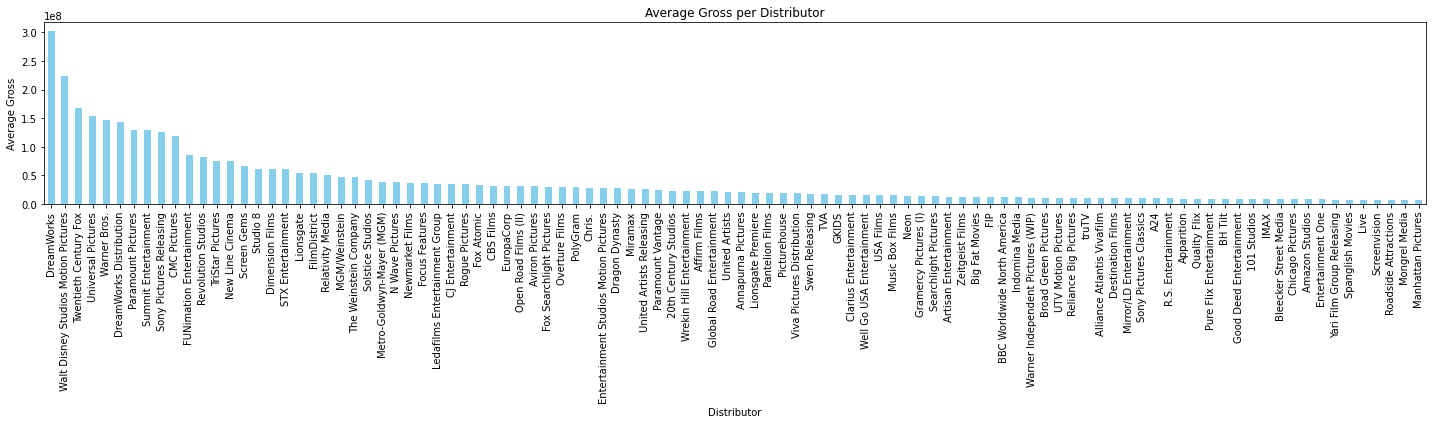

In [8]:
# Plotting the histogram
plt.figure(figsize=(20, 6))
grouped_data_sorted["Average_Gross"][0:100].plot(kind='bar', color='skyblue')
plt.title('Average Gross per Distributor')
plt.xlabel('Distributor')
plt.ylabel('Average Gross')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<h3> BUDGET

In [9]:
budget_data = useful_data[useful_data.budget != 0.0]


In [10]:
sorted_data = budget_data.sort_values(by='worldwide_gross', ascending=False)

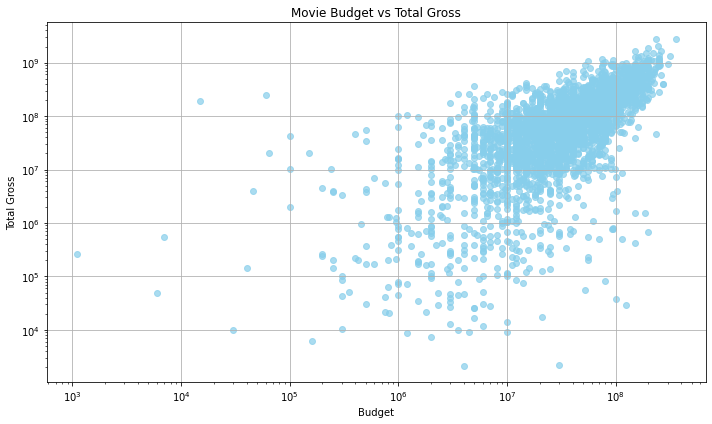

In [11]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sorted_data['budget'], sorted_data['worldwide_gross'], color='skyblue', alpha=0.7)
plt.title('Movie Budget vs Total Gross')
plt.xlabel('Budget')
plt.ylabel('Total Gross')
plt.xscale('log')  # Use logarithmic scale for better visualization if budgets vary widely
plt.yscale('log')  # Use logarithmic scale for better visualization if grosses vary widely
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# calculate the Pearson correlation coefficient

correlation_coefficient = budget_data['budget'].corr(budget_data['worldwide_gross'])

print(f"The correlation coefficient between Budget and Total Gross is: {correlation_coefficient}")

The correlation coefficient between Budget and Total Gross is: 0.7132401484873592


<h3> RELEASE DATE

In [13]:
release_data = useful_data[["release_date", "worldwide_gross"]]
release_data = release_data.dropna()
len(release_data)

8328

In [14]:
# Convert 'Release_Date' column to datetime
release_data['release_date'] = pd.to_datetime(release_data['release_date'])

# Extract month from 'Release_Date'
release_data['release_month'] = release_data['release_date'].dt.month

In [15]:
# Plotting the histogram
grouped_data = release_data.groupby('release_month')['worldwide_gross'].agg(['sum', 'mean', 'count'])
grouped_data.columns = ['Total_Gross', 'Average_Gross', 'Count']

# Sorting the distributors based on their total gross in descending order
grouped_data_sorted = grouped_data.sort_values(by='Average_Gross', ascending=False)
grouped_data_sorted


,Total_Gross,Average_Gross,Count
release_month,,,
12,71283326350,1.011111e+08,705
7,60232439657,9.939346e+07,606
11,60025348713,9.378961e+07,640
6,56196083295,9.197395e+07,611
5,58506356395,8.642002e+07,677
2,29083028075,5.040386e+07,577
3,37825436540,4.963968e+07,762
8,30638745086,4.079726e+07,751
4,31488803150,3.936100e+07,800


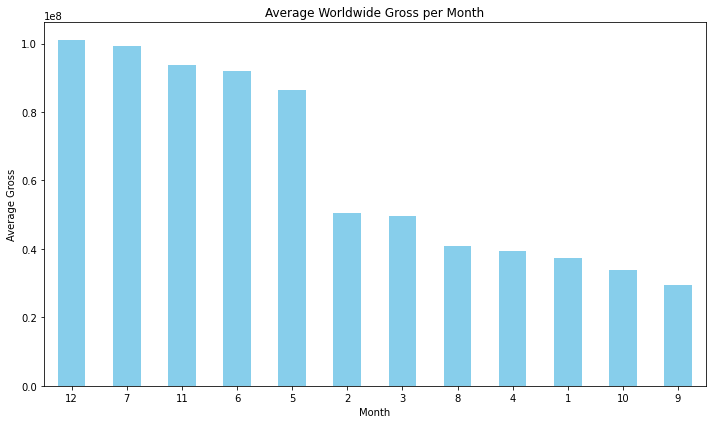

In [16]:
plt.figure(figsize=(10, 6))
grouped_data_sorted["Average_Gross"].plot(kind='bar', color='skyblue')
plt.title('Average Worldwide Gross per Month')
plt.xlabel('Month')
plt.ylabel('Average Gross')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

<h3> MPAA RATING

In [17]:
mpaa_data = useful_data[["mpaa_rating", "worldwide_gross"]]
mpaa_data = mpaa_data.dropna()
len(mpaa_data)

8328

In [18]:
# taking these out because they only have 1 or 2 entries
mpaa_data = mpaa_data[mpaa_data["mpaa_rating"] != "Unrated"]
mpaa_data = mpaa_data[mpaa_data["mpaa_rating"] != "M/PG"]

In [19]:
# Plotting the histogram
grouped_data = mpaa_data.groupby('mpaa_rating')['worldwide_gross'].agg(['sum', 'mean', 'count'])
grouped_data.columns = ['Total_Gross', 'Average_Gross', 'Count']

# Sorting the distributors based on their total gross in descending order
grouped_data_sorted = grouped_data.sort_values(by='Average_Gross', ascending=False)
grouped_data_sorted


,Total_Gross,Average_Gross,Count
mpaa_rating,,,
PG-13,258140636749,1.003267e+08,2573
PG,110679909658,9.549604e+07,1159
G,8170276411,9.391122e+07,87
R,130337331571,2.916476e+07,4469
NC-17,179582524,1.056368e+07,17
Not Rated,196052447,1.031855e+07,19


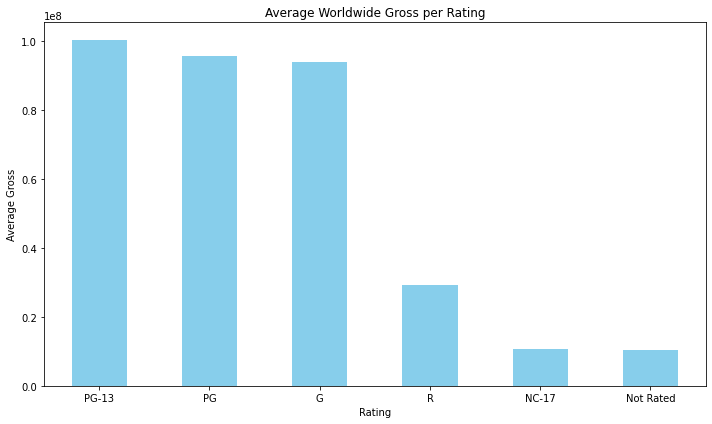

In [20]:
plt.figure(figsize=(10, 6))
grouped_data_sorted["Average_Gross"].plot(kind='bar', color='skyblue')
plt.title('Average Worldwide Gross per Rating')
plt.xlabel('Rating')
plt.ylabel('Average Gross')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

<h3> RUNNING TIME

In [21]:
running_data = useful_data[["running_time", "worldwide_gross"]]
running_data = running_data.dropna()
len(running_data)

8328

In [22]:
# Function to convert running time string to minutes
def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    
    # Split the string by spaces and extract hours and minutes
    split_time = time_str.split()
    
    if 'hr' in split_time:
        index_hr = split_time.index('hr')
        hours = int(split_time[index_hr - 1])
    
    if 'min' in split_time:
        index_minutes = split_time.index('min')
        minutes = int(split_time[index_minutes - 1])
    
    # Convert hours to minutes and add to total minutes
    total_minutes = (hours * 60) + minutes
    
    return total_minutes

In [23]:
running_data['Running_Time_Minutes'] = running_data['running_time'].apply(convert_to_minutes)
running_data.head()


,running_time,worldwide_gross,Running_Time_Minutes
0,2 hr 17 min,1519755,137
1,1 hr 26 min,304281,86
2,1 hr 32 min,494000,92
3,1 hr 45 min,47696068,105
5,1 hr 16 min,1900000,76


In [24]:
sorted_data = running_data.sort_values(by='worldwide_gross', ascending=False)
sorted_data.head()

,running_time,worldwide_gross,Running_Time_Minutes
444,3 hr 1 min,2797800564,181
6763,2 hr 42 min,2743856300,162
2859,2 hr 18 min,2068223624,138
1121,2 hr 29 min,2048359754,149
12666,3 hr 14 min,1843221532,194


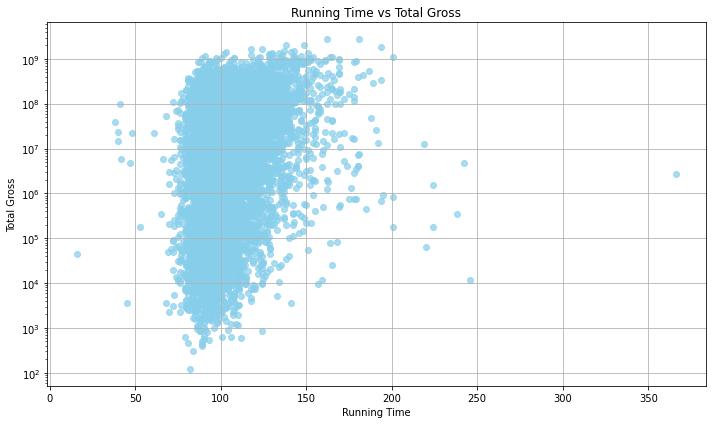

In [25]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sorted_data['Running_Time_Minutes'], sorted_data['worldwide_gross'], color='skyblue', alpha=0.7)
plt.title('Running Time vs Total Gross')
plt.xlabel('Running Time')
plt.ylabel('Total Gross')
# plt.xscale('log')  # Use logarithmic scale for better visualization if budgets vary widely
plt.yscale('log')  # Use logarithmic scale for better visualization if grosses vary widely
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
correlation_coefficient = running_data['Running_Time_Minutes'].corr(running_data['worldwide_gross'])

print(f"The correlation coefficient between Running Time and Total Gross is: {correlation_coefficient}")

The correlation coefficient between Running Time and Total Gross is: 0.286812993142031


<h3> GENRES

In [27]:
genre_data = useful_data[["genres", "worldwide_gross"]]
genre_data = genre_data.dropna()
len(genre_data)

8328

In [28]:
genre_data.head()

,genres,worldwide_gross
0,"['Crime', 'Drama', 'Horror', 'Mystery', 'Thril...",1519755
1,"['Animation', 'Comedy', 'Family', 'Fantasy', '...",304281
2,"['Adventure', 'Animation', 'Comedy', 'Family',...",494000
3,"['Drama', 'Romance']",47696068
5,"['Animation', 'Family', 'Fantasy', 'Musical']",1900000


In [29]:
# Create an empty dictionary to store genre counts
genre_counts = {}

# Iterate through each row in the 'Genres' column
for index, row in genre_data.iterrows():
    genres = row['genres'].split(',')  # Split the genres if they are separated by comma

    gross_this_movie = row["worldwide_gross"]
    
    # Iterate through each genre in the list and update the counts in the dictionary
    for genre in genres:
        proper_name = genre.strip().replace("'", "").replace("[", "").replace("]", "").replace(" ", "")
        if proper_name not in genre_counts:
            genre_counts[proper_name] = {'count': 1, 'total_gross': row['worldwide_gross']}
        else:
            genre_counts[proper_name]['count'] += 1
            genre_counts[proper_name]['total_gross'] += row['worldwide_gross']
            genre_counts[proper_name]['average_gross'] = genre_counts[proper_name]['total_gross'] / genre_counts[proper_name]['count']


# Print the dictionary with genre counts
print(genre_counts)

{'Crime': {'count': 1364, 'total_gross': 59222267709, 'average_gross': 43418084.83064516}, 'Drama': {'count': 4910, 'total_gross': 176754611206, 'average_gross': 35998902.48594705}, 'Horror': {'count': 717, 'total_gross': 34954905668, 'average_gross': 48751611.81032078}, 'Mystery': {'count': 799, 'total_gross': 55120364554, 'average_gross': 68986689.05381727}, 'Thriller': {'count': 2086, 'total_gross': 140290307496, 'average_gross': 67253263.42090125}, 'Animation': {'count': 348, 'total_gross': 66768802041, 'average_gross': 191864373.68103448}, 'Comedy': {'count': 3119, 'total_gross': 179858470584, 'average_gross': 57665428.20904136}, 'Family': {'count': 722, 'total_gross': 109967595419, 'average_gross': 152309688.94598338}, 'Fantasy': {'count': 777, 'total_gross': 134440220254, 'average_gross': 173024736.4916345}, 'Adventure': {'count': 1096, 'total_gross': 241918246206, 'average_gross': 220728326.83029196}, 'Romance': {'count': 2011, 'total_gross': 82801752509, 'average_gross': 41174

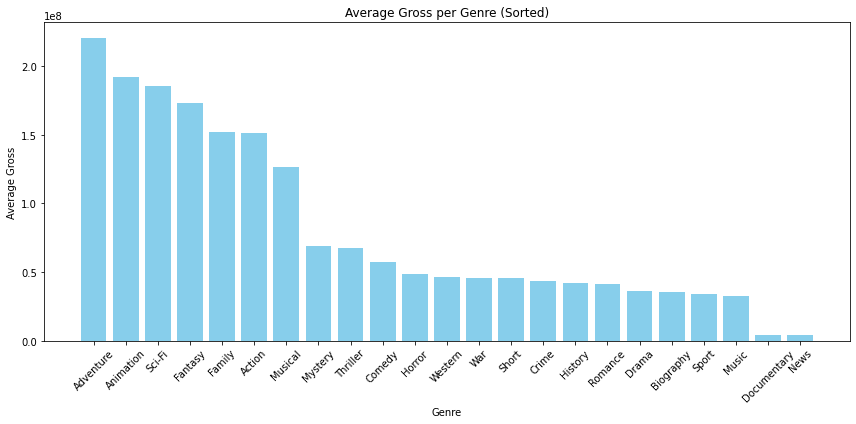

In [30]:
# Create lists to store genres and their corresponding average gross
genres = []
average_gross = []

# Populate the lists with genre names and their respective average gross values
for genre, data in genre_counts.items():
    if data["count"] == 1:
        continue
    genres.append(genre)
    average_gross.append(data['average_gross'])

# Sort both lists based on the average gross
sorted_data = sorted(zip(average_gross, genres), reverse=True)
sorted_average_gross, sorted_genres = zip(*sorted_data)

# Plotting the genre and its average gross in sorted order
plt.figure(figsize=(12, 6))
plt.bar(sorted_genres, sorted_average_gross, color='skyblue')
plt.title('Average Gross per Genre (Sorted)')
plt.xlabel('Genre')
plt.ylabel('Average Gross')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# Sort the DataFrame by 'Worldwide_Gross' column in descending order
sorted_movies_data = useful_data.sort_values(by='worldwide_gross', ascending=False)

# These are the top 10 grossing movies!
# print(sorted_movies_data.head(10))
sorted_movies_data.head(10)


,title,imdb_title_identifier,distributor_name,budget,release_date,worldwide_gross,genres,mpaa_rating,running_time
444,Avengers: Endgame,tt4154796,Walt Disney Studios Motion Pictures,356000000.0,2019-04-26,2797800564,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",PG-13,3 hr 1 min
6763,Avatar,tt0499549,Twentieth Century Fox,237000000.0,2009-12-18,2743856300,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",PG-13,2 hr 42 min
2859,Star Wars: Episode VII - The Force Awakens,tt2488496,Walt Disney Studios Motion Pictures,245000000.0,2015-12-18,2068223624,"['Action', 'Adventure', 'Sci-Fi']",PG-13,2 hr 18 min
1121,Avengers: Infinity War,tt4154756,Walt Disney Studios Motion Pictures,0.0,2018-04-27,2048359754,"['Action', 'Adventure', 'Sci-Fi']",PG-13,2 hr 29 min
12666,Titanic,tt0120338,Paramount Pictures,200000000.0,1997-12-19,1843221532,"['Drama', 'Romance']",PG-13,3 hr 14 min
3248,Jurassic World,tt0369610,Universal Pictures,150000000.0,2015-06-12,1670400637,"['Action', 'Adventure', 'Sci-Fi']",PG-13,2 hr 4 min
333,The Lion King,tt6105098,Walt Disney Studios Motion Pictures,260000000.0,2019-07-19,1656713458,"['Adventure', 'Animation', 'Drama', 'Family', ...",PG,1 hr 58 min
5393,The Avengers,tt0848228,Walt Disney Studios Motion Pictures,220000000.0,2012-05-04,1518812988,"['Action', 'Adventure', 'Sci-Fi']",PG-13,2 hr 23 min
3380,Furious 7,tt2820852,Universal Pictures,190000000.0,2015-04-03,1515047671,"['Action', 'Adventure', 'Thriller']",PG-13,2 hr 17 min
195,Frozen II,tt4520988,Walt Disney Studios Motion Pictures,0.0,2019-11-22,1450026933,"['Adventure', 'Animation', 'Comedy', 'Family',...",PG,1 hr 43 min


In [32]:
#To csv for later inspection
sorted_movies_data[0:10].to_csv("top10movies.csv")

In [33]:
# calculating some averages
average_budget = useful_data[useful_data.budget != 0.0]['budget'].mean()
average_budget

47900984.7951236

In [34]:
average_runtime = running_data["Running_Time_Minutes"].mean()
average_runtime

104.93347742555235